In [15]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline

In [16]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [17]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [18]:
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [19]:
df.dtypes

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


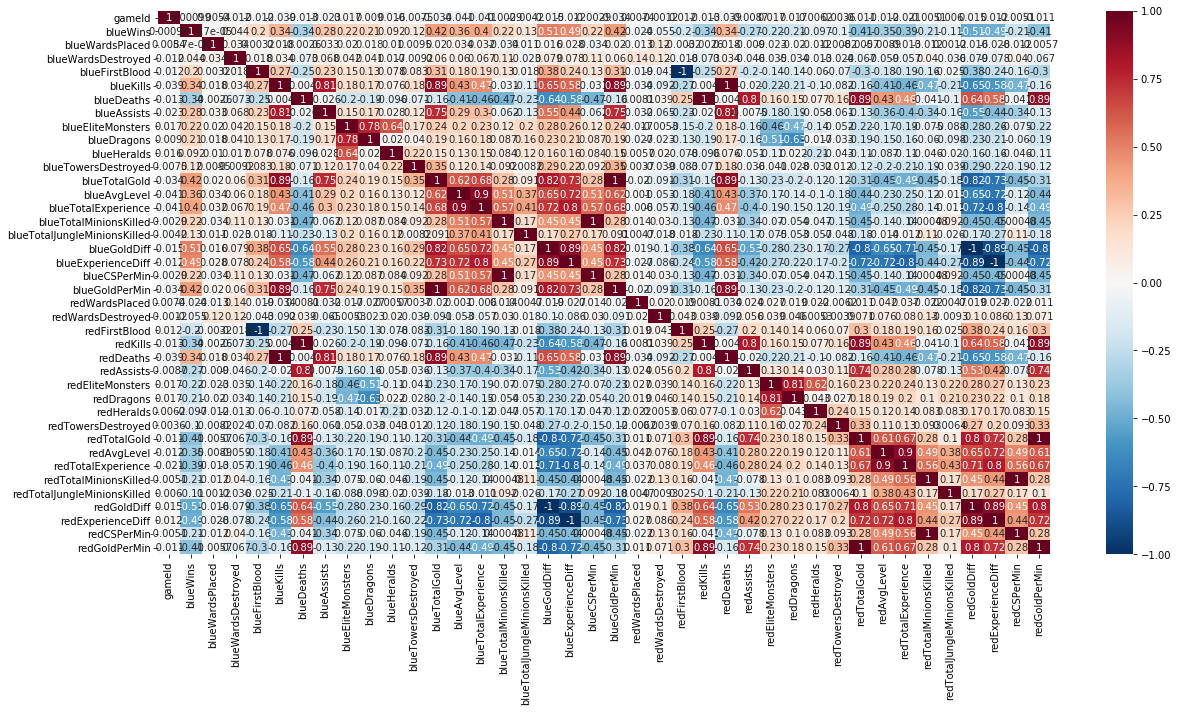

In [20]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='RdBu_r',annot=True)

Some variable pairs are perfectly correlated so they are interchangble: <br/>
1.redFirstBlood and blueFirstBlood <br/>
2.redDeaths and blueKills <br/>
3.redKills and bluDeaths <br/>
4.blueGoldPerMin and blueTotalGold <br/>
5.blueCSPerMin and blueTotalMinionsKilled <br/>
6.redGoldDiff and blueGoldDiff <br/>
7.redExperienceDiff and blueExperienceDiff <br/>
8.redGoldPerMin and redTotalGold <br/>
9.redCSPerMin and redTotalMinionsKilled <br/>

# Dropping irrelevant columns

In [21]:
# gameId are irrelavant obviously. blueAvgLevel and redAvgLevel are not significant?
#TotalJungleMinionsKilled and TotalMinionsKilled are repeated
df = df.drop(columns=['gameId','redFirstBlood','redDeaths','redKills','blueGoldPerMin','blueCSPerMin',
                      'redGoldDiff','redExperienceDiff','redGoldPerMin','redCSPerMin',
                       'blueTotalJungleMinionsKilled','redTotalJungleMinionsKilled'])
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,8,0,0,0,0,16567,6.8,17047,197
1,0,12,1,0,5,5,5,0,0,0,...,1,2,2,1,1,1,17620,6.8,17438,240
2,0,15,0,0,7,11,4,1,1,0,...,3,14,0,0,0,0,17285,6.8,17254,203
3,0,43,1,0,4,5,5,1,0,1,...,2,10,0,0,0,0,16478,7.0,17961,235
4,0,75,4,0,6,6,6,0,0,0,...,2,7,1,1,0,0,17404,7.0,18313,225


# standardize

In [22]:
scaler = StandardScaler()
features = df.drop(columns=['blueWins']).values
x=scaler.fit_transform(features)
std_df= pd.DataFrame(data = x, columns = df.drop(columns=['blueWins']).columns)
std_df.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled
0,0.316996,-0.379275,0.990429,0.935301,-0.046926,1.071495,-0.879231,-0.753226,-0.481132,-0.210439,...,1.532493,0.329496,-0.914893,-0.838966,-0.436495,-0.198353,0.052293,-0.410475,-0.763215,-0.928741
1,-0.570992,-0.839069,-1.009663,-0.393216,-0.387796,-0.404768,-0.879231,-0.753226,-0.481132,-0.210439,...,-0.805870,-1.148188,2.277700,1.191944,2.290977,4.412301,0.758619,-0.410475,-0.436980,1.033784
2,-0.404494,-1.298863,-1.009663,0.271042,1.657424,-0.650812,0.719503,1.327623,-0.481132,-0.210439,...,0.129475,1.807181,-0.914893,-0.838966,-0.436495,-0.198353,0.533909,-0.410475,-0.590502,-0.654900
3,1.149484,-0.839069,-1.009663,-0.725346,-0.387796,-0.404768,0.719503,-0.753226,2.078430,-0.210439,...,-0.338198,0.822058,-0.914893,-0.838966,-0.436495,-0.198353,-0.007406,0.244627,-0.000609,0.805583
4,2.925460,0.540312,-1.009663,-0.061087,-0.046926,-0.158724,-0.879231,-0.753226,-0.481132,-0.210439,...,-0.338198,0.083215,0.681403,1.191944,-0.436495,-0.198353,0.613731,0.244627,0.293085,0.349182


# Normalize

In [23]:
X = preprocessing.normalize(features)
norm_df = pd.DataFrame(data = X, columns = df.drop(columns=['blueWins']).columns)
norm_df.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled
0,0.000825,0.000059,0.000029,0.000265,0.000177,0.000324,0.00000,0.00000,0.00000,0.0,...,0.000177,0.000236,0.000000,0.000000,0.00000,0.00000,0.488095,0.000200,0.502237,0.005804
1,0.000361,0.000030,0.000000,0.000150,0.000150,0.000150,0.00000,0.00000,0.00000,0.0,...,0.000030,0.000060,0.000060,0.000030,0.00003,0.00003,0.529949,0.000205,0.524475,0.007218
2,0.000448,0.000000,0.000000,0.000209,0.000328,0.000119,0.00003,0.00003,0.00000,0.0,...,0.000090,0.000418,0.000000,0.000000,0.00000,0.00000,0.516088,0.000203,0.515162,0.006061
3,0.001269,0.000030,0.000000,0.000118,0.000148,0.000148,0.00003,0.00000,0.00003,0.0,...,0.000059,0.000295,0.000000,0.000000,0.00000,0.00000,0.486323,0.000207,0.530092,0.006936
4,0.002119,0.000113,0.000000,0.000170,0.000170,0.000170,0.00000,0.00000,0.00000,0.0,...,0.000057,0.000198,0.000028,0.000028,0.00000,0.00000,0.491821,0.000198,0.517508,0.006358


Text(0.5, 0, 'Teams')

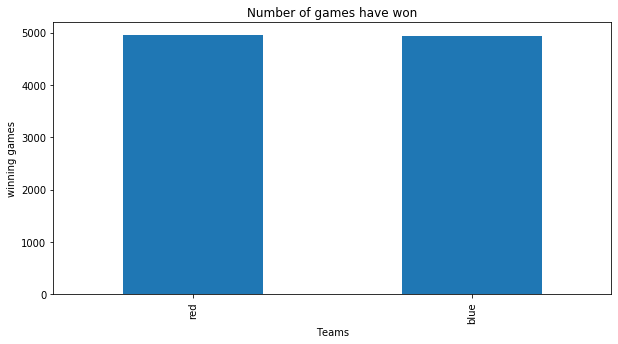

In [24]:
df.blueWins.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Number of games have won')
plt.ylabel('winning games')
plt.xticks([0,1],['red','blue'])
plt.xlabel('Teams')

# Detecting Outliers

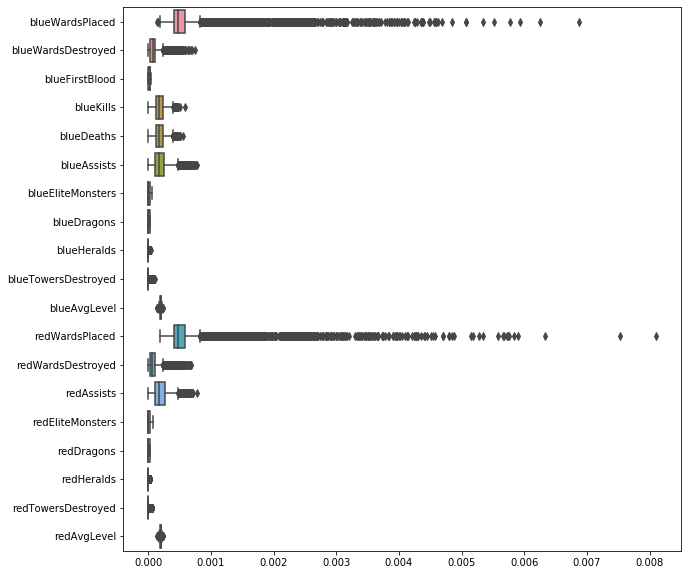

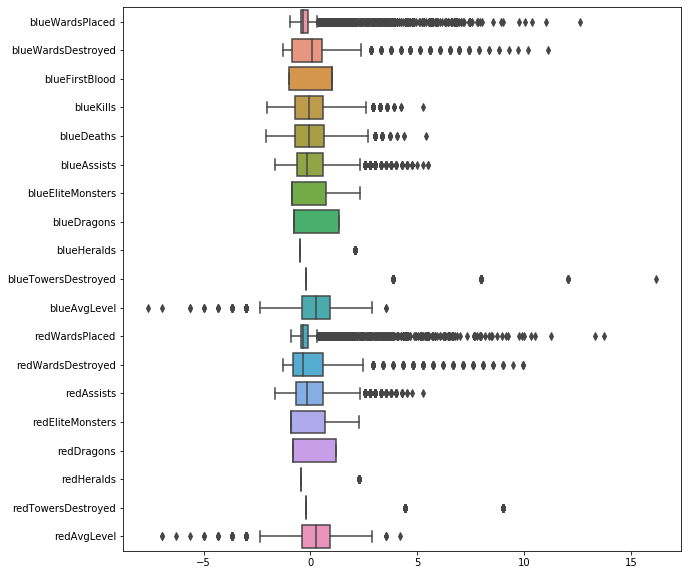

In [26]:
fig,ax= plt.subplots(figsize=(10,10))
sns.boxplot(data=norm_df.drop(columns=['blueTotalGold','blueTotalExperience','redTotalGold',
                                       'redTotalExperience','blueGoldDiff', 'blueExperienceDiff',
                                       'blueTotalMinionsKilled','redTotalMinionsKilled'],),orient='h')
fig2,ax2= plt.subplots(figsize=(10,10))
sns.boxplot(data=std_df.drop(columns=['blueTotalGold','blueTotalExperience','redTotalGold',
                                       'redTotalExperience','blueGoldDiff', 'blueExperienceDiff',
                                       'blueTotalMinionsKilled','redTotalMinionsKilled'],),orient='h')

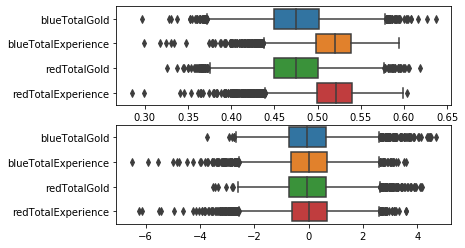

In [27]:
plt.subplot(2,1,1)
sns.boxplot(data=norm_df.loc[:,['blueTotalGold','blueTotalExperience','redTotalGold','redTotalExperience']],orient='h')
plt.subplot(2,1,2)
sns.boxplot(data=std_df.loc[:,['blueTotalGold','blueTotalExperience','redTotalGold','redTotalExperience']],orient='h')

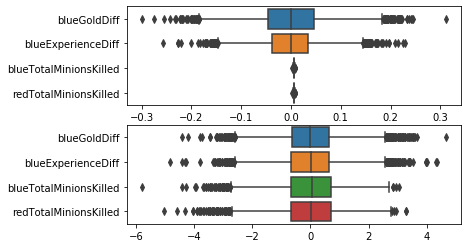

In [28]:
plt.subplot(2,1,1)
sns.boxplot(data=norm_df.loc[:,['blueGoldDiff','blueExperienceDiff','blueTotalMinionsKilled',
                                'redTotalMinionsKilled']],orient='h')
plt.subplot(2,1,2)
sns.boxplot(data=std_df.loc[:,['blueGoldDiff','blueExperienceDiff','blueTotalMinionsKilled',
                               'redTotalMinionsKilled']],orient='h')

In [29]:
#blueTotalGold,blueTotalExperience,redTotalGold,redTotalExperience  #5 digits
#blueGoldDiff, blueExperienceDiff #3-4 digts and postive and negative
#blueTotalMinionsKilled,redTotalMinionsKilled #200+
#blueTotalJungleMinionsKilled,redTotalJungleMinionsKilled #50ish